In [1]:
import pandas as pd

In [2]:
# Load the CSV file
df = pd.read_csv('customer_feedback.csv')

In [3]:
# Check the first few rows of the data
df.head()

,CustomerID,Feedback,Rating
0,CUST0001,Great value for the price. I will definitely b...,4
1,CUST0002,I'm disappointed with the customer service. Th...,2
2,CUST0003,I love the design and functionality. Highly re...,2
3,CUST0004,The app is user-friendly and makes my tasks so...,5
4,CUST0005,I'm disappointed with the customer service. Th...,4


In [4]:
# Check for missing values
df.isnull().sum()

,0
CustomerID,0
Feedback,0
Rating,0


In [5]:
# Get a summary of the data
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 3 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   CustomerID  1000 non-null   object
 1   Feedback    1000 non-null   object
 2   Rating      1000 non-null   int64 
dtypes: int64(1), object(2)
memory usage: 23.6+ KB


## Preprocessing

In [6]:
import spacy

In [7]:
# Load the spaCy model
nlp = spacy.load("en_core_web_sm")

In [8]:
# Function to preprocess text
def preprocess_text(text):
    doc = nlp(text)

    # Remove stopwords and punctuation, and lemmatize the tokens
    clean_tokens = [token.lemma_.lower() for token in doc if not token.is_stop and not token.is_punct]

    # Join the tokens back into a clean string
    cleaned_text = " ".join(clean_tokens)

    return cleaned_text

In [9]:
# Apply the preprocessing function to the feedback column
df['Cleaned_Feedback'] = df['Feedback'].apply(preprocess_text)

In [10]:
# Display the cleaned data
print("Cleaned data:\n")
df[['Feedback', 'Cleaned_Feedback']].head()

Cleaned data:



,Feedback,Cleaned_Feedback
0,Great value for the price. I will definitely b...,great value price definitely buy
1,I'm disappointed with the customer service. Th...,disappointed customer service unhelpful
2,I love the design and functionality. Highly re...,love design functionality highly recommend
3,The app is user-friendly and makes my tasks so...,app user friendly make task easy
4,I'm disappointed with the customer service. Th...,disappointed customer service unhelpful


In [11]:
# Save cleaned data
df.to_csv('cleaned_feedback.csv', index = False)

## Sentiment Analysis

In [17]:
!pip install spacytextblob

In [12]:
import spacy
from spacytextblob.spacytextblob import SpacyTextBlob

In [13]:
# Add the SpacyTextBlob component (provides polarity scores)
nlp.add_pipe("spacytextblob")

In [14]:
# Define a function to analyze sentiment
def get_sentiment(text):
    doc = nlp(text)
    polarity = doc._.blob.polarity  # Sentiment score: -1 (negative) to +1 (positive)

    if polarity > 0.05:
        return "Positive"
    elif polarity < -0.05:
        return "Negative"
    else:
        return "Neutral"

In [15]:
# Apply the function to the cleaned feedback column
df['Sentiment'] = df['Cleaned_Feedback'].apply(get_sentiment)

In [16]:
# Display the first few rows
df[['Feedback', 'Cleaned_Feedback', 'Sentiment']].head()

,Feedback,Cleaned_Feedback,Sentiment
0,Great value for the price. I will definitely b...,great value price definitely buy,Positive
1,I'm disappointed with the customer service. Th...,disappointed customer service unhelpful,Negative
2,I love the design and functionality. Highly re...,love design functionality highly recommend,Positive
3,The app is user-friendly and makes my tasks so...,app user friendly make task easy,Positive
4,I'm disappointed with the customer service. Th...,disappointed customer service unhelpful,Negative


In [17]:
# Save to CSV
df.to_csv('customer_feedback_with_sentiment.csv', index=False)

## Visualize

In [18]:
import matplotlib.pyplot as plt
import seaborn as sns

In [19]:
# Set the style for the plot
sns.set_style("whitegrid")

In [20]:
# Count the occurrences of each sentiment
sentiment_counts = df['Sentiment'].value_counts()
sentiment_counts

,count
Sentiment,
Positive,737
Negative,263


There was no neutral sentiment.

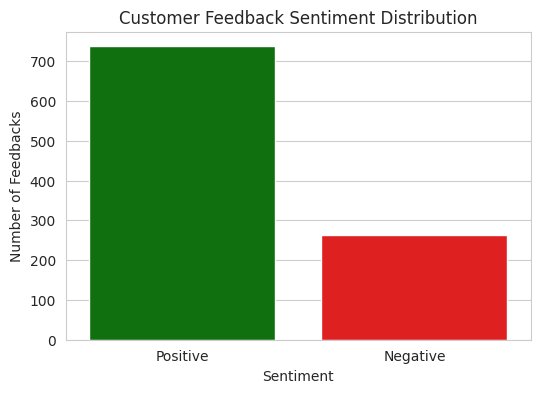

In [21]:
# Create a bar plot
plt.figure(figsize=(6, 4))
sns.barplot(x=sentiment_counts.index, y=sentiment_counts.values, hue=sentiment_counts.index, palette=['green','red'])

# Add labels and title
plt.xlabel("Sentiment")
plt.ylabel("Number of Feedbacks")
plt.title("Customer Feedback Sentiment Distribution");

## Generate word cloud to find the most common words

In [22]:
import wordcloud
from wordcloud import WordCloud

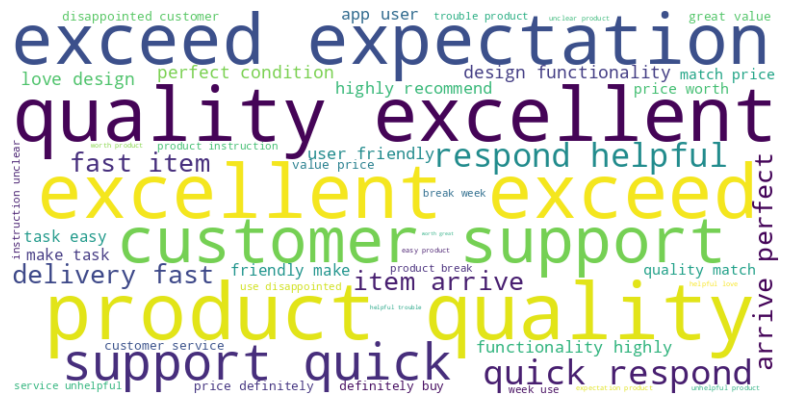

In [23]:
# Combine all cleaned feedback into one text
text = " ".join(df['Cleaned_Feedback'])

# Generate word cloud
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(text)

# Display the word cloud
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off");  # Hide the axis

This has worked but we may need to separate the positive feedback from the negative so that the business can take necessary action.

In [24]:
# Define a function to generate word cloud
def generate_wordcloud(text, title, color):
    wordcloud = WordCloud(width=500, height=300, background_color="white", colormap=color).generate(text)

    # Display the word cloud
    plt.figure(figsize=(6, 4))
    plt.imshow(wordcloud, interpolation="bilinear")
    plt.axis("off")
    plt.title(title, fontsize=14);

In [25]:
# Separate positive and negative feedback
positive_text = " ".join(df[df["Sentiment"] == "Positive"]["Cleaned_Feedback"])
negative_text = " ".join(df[df["Sentiment"] == "Negative"]["Cleaned_Feedback"])

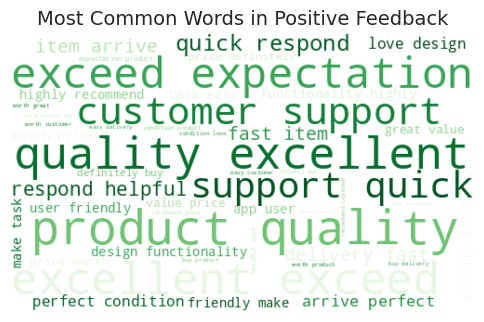

In [26]:
# Generate positive word clouds
generate_wordcloud(positive_text, "Most Common Words in Positive Feedback", "Greens")

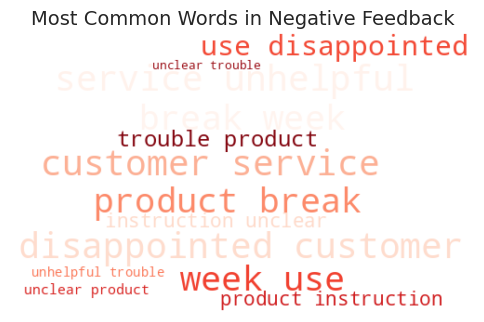

In [27]:
# Generate negative word cloud
generate_wordcloud(negative_text, "Most Common Words in Negative Feedback", "Reds")

## A recap of what we did:

- Collected Customer Feedback

- Preprocessed the Data – Removed stopwords, punctuation, and lemmatized words using spaCy.

- Performed Sentiment Analysis – Classified feedback as positive or negative using a pre-trained sentiment model.

- Visualized the Insights – Used bar charts and word clouds to highlight patterns.

**Key Findings:**
- There are more positive feedback than negative, indicating overall customer satisfaction.
- Some of the common positive words are: "quality," "excellent," "quick". This suggests customers like the product's usability.
- Some common negative words: "disappointed," "issue", "use". These show areas for improvement.

**Optional enhancements to this project:**

- Fine-tune sentiment analysis using a more advanced NLP model (like a transformer-based model).

- Perform topic modeling to group feedback into common themes (e.g., delivery issues, app usability).

- Automate feedback monitoring using a dashboard to track sentiment over time.